# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [4]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [5]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())# Combining all the above stundents 


100%|██████████| 109248/109248 [01:13<00:00, 1480.26it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:03<00:00, 33536.85it/s]


## 1.5 Preparing data for models

In [21]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [22]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Music_Arts', 'Care_Hunger', 'AppliedLearning', 'Health_Sports', 'Warmth', 'Math_Science', 'SpecialNeeds', 'History_Civics', 'Literacy_Language']
Shape of matrix after one hot encodig  (109248, 9)


In [23]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['CharacterEducation', 'Warmth', 'Economics', 'Music', 'Health_LifeScience', 'AppliedSciences', 'History_Geography', 'Extracurricular', 'Health_Wellness', 'Gym_Fitness', 'SocialSciences', 'Civics_Government', 'TeamSports', 'SpecialNeeds', 'PerformingArts', 'ParentInvolvement', 'College_CareerPrep', 'VisualArts', 'Literature_Writing', 'EnvironmentalScience', 'FinancialLiteracy', 'NutritionEducation', 'Care_Hunger', 'Mathematics', 'ForeignLanguages', 'CommunityService', 'Literacy', 'EarlyDevelopment', 'Other', 'ESL']
Shape of matrix after one hot encodig  (109248, 30)


In [24]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# you can do the similar thing with state, teacher_prefix and project_grade_category also
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
state_dict = dict(my_counter)
state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1])) 

In [25]:
vectorizer = CountVectorizer(vocabulary=list(state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['school_state'].values)
print(vectorizer.get_feature_names())

['KS', 'RI', 'WV', 'AL', 'MI', 'OH', 'MT', 'ID', 'NY', 'SD', 'MO', 'WI', 'CA', 'DE', 'WY', 'KY', 'HI', 'MS', 'WA', 'IL', 'IN', 'AZ', 'AK', 'SC', 'NJ', 'NC', 'OK', 'FL', 'NM', 'UT', 'OR', 'ME', 'MA', 'DC', 'MD', 'AR', 'CO', 'NH', 'NV', 'MN', 'TX', 'NE', 'PA', 'IA', 'CT', 'ND', 'TN', 'VA', 'GA', 'VT', 'LA']


In [26]:
'''teacher_prefix
'''

for i in project_data['teacher_prefix'].values:

    if i=='nan':
        i='nan'


In [27]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna(" ")# to handle nan values by replacing them with empty strings

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())
    
prefix = dict(my_counter)
prefix = dict(sorted(prefix.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(prefix.keys()), lowercase=False, binary=True)
prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

['Dr.', 'Ms.', 'Teacher', 'Mr.', 'Mrs.']
Shape of matrix after one hot encodig  (109248, 5)


In [28]:
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split(","))
    
grade_dict = dict(my_counter)
grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))    
vectorizer = CountVectorizer(vocabulary=list(grade_dict.keys()), lowercase=False, binary=True)
grade_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['Grades 6-8', 'Grades PreK-2', 'Grades 3-5', 'Grades 9-12']
Shape of matrix after one hot encodig  (109248, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [28]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109248, 16623)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109248, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [27]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:32<00:00, 3369.33it/s]


109248
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [03:36<00:00, 503.77it/s]


109248
300


In [0]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [29]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [30]:
project_data['clean_essay']=preprocessed_essays
project_data['clean_title']=preprocessed_titles

In [244]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

In [245]:
price_standardized

array([[-0.3905327 ],
       [ 0.00239637],
       [ 0.59519138],
       ...,
       [-0.15825829],
       [-0.61243967],
       [-0.51216657]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [0]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109248, 9)
(109248, 30)
(109248, 16623)
(109248, 1)


In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109248, 16663)

In [32]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [31]:
X=project_data['clean_essay'].values

__ Computing Sentiment Scores__

In [32]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = X
'''a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'''
NEG=[]
NEU=[]
POS=[]
COMP=[]
s={} 
h=[]
for i in for_sentiment:
       
    ss = sid.polarity_scores(i)
    
    for k in ss:
        s={k:ss[k]}
        
        h.append(s)
        

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

In [33]:
g=pd.DataFrame(h)
print(g.head(5))

   compound    neg    neu    pos
0       NaN  0.012    NaN    NaN
1       NaN    NaN    NaN  0.144
2    0.9694    NaN    NaN    NaN
3       NaN    NaN  0.844    NaN
4       NaN  0.048    NaN    NaN


In [34]:
compound=list(g['compound'].dropna())
#print(compound)
pos=list(g['pos'].dropna())
#print(pos)
neu=list(g['neu'].dropna())
#print(neu)
neg=list(g['neg'].dropna())
#print(neg)

In [35]:
q={'pos':pos,'neg':neg,'compound':compound,'neu':neu}

In [36]:
q=pd.DataFrame(q)
print(q.head(10))

   compound    neg    neu    pos
0    0.9694  0.012  0.844  0.144
1    0.9856  0.048  0.669  0.283
2    0.9816  0.122  0.659  0.219
3    0.9656  0.106  0.649  0.246
4    0.8524  0.066  0.791  0.143
5    0.9776  0.111  0.647  0.242
6    0.9743  0.079  0.680  0.241
7    0.9891  0.011  0.768  0.222
8    0.9975  0.009  0.630  0.361
9    0.9893  0.105  0.559  0.336


In [37]:
project_data['compound']=compound
project_data['neg']=neg
project_data['pos']=pos
project_data['neu']=neu

In [38]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'quantity',
       'clean_essay', 'clean_title', 'compound', 'neg', 'pos', 'neu'],
      dtype='object')

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [39]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
X=project_data
Y=X['project_is_approved']    

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, stratify=Y)

In [41]:
print("="*100)

print("train=>",X_train.shape, y_train.shape)

print("test=>",X_test.shape, y_test.shape)

print("="*100)

train=> (73196, 26) (73196,)
test=> (36052, 26) (36052,)


<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

##### numerical

In [42]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

'''encode numerical feature price'''
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1)) # use code from sample

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))

X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)

print(X_test_price_norm.shape, y_test.shape)

print("="*100)        

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [43]:
'''encode numerical feature teacher_number_of_previously_posted_projects'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
 
X_train_posted_norm= normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_posted_norm.shape, y_train.shape)

print(X_test_posted_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [44]:
'''encode numerical feature compound from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['compound'].values.reshape(-1,1))
 
X_train_comp_norm= normalizer.transform(X_train['compound'].values.reshape(-1,1))

X_test_comp_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_comp_norm.shape, y_train.shape)

print(X_test_comp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [45]:
'''encode numerical feature pos from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['pos'].values.reshape(-1,1))
 
X_train_pos_norm= normalizer.transform(X_train['pos'].values.reshape(-1,1))

X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)

print(X_test_pos_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [46]:
'''encode numerical feature neg from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neg'].values.reshape(-1,1))
 
X_train_neg_norm= normalizer.transform(X_train['neg'].values.reshape(-1,1))

X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)

print(X_test_neg_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [47]:
'''encode numerical feature neu from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['neu'].values.reshape(-1,1))
 
X_train_neu_norm= normalizer.transform(X_train['neu'].values.reshape(-1,1))

X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)

print(X_test_neu_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [48]:
'''encode numerical feature quantity from sentimental'''

normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['quantity'].values.reshape(-1,1))
 
X_train_quantity_norm= normalizer.transform(X_train['quantity'].values.reshape(-1,1))

X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)

print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [49]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
'''count no of words in titles'''
title_word_count_train = X_train['clean_title'].str.split().apply(len)
title_word_count_train = title_word_count_train.values



title_word_count_test = X_test['clean_title'].str.split().apply(len)
title_word_count_test =title_word_count_test.values

In [50]:
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(title_word_count_train.reshape(-1,1))
 
X_train_title_norm= normalizer.transform(title_word_count_train.reshape(-1,1))

X_test_title_norm = normalizer.transform(title_word_count_test.reshape(-1,1))

print("After vectorizations")
print(X_train_title_norm.shape, y_train.shape)

print(X_test_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


In [51]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
'''count no of words in essays'''
essay_word_count_train = X_train['clean_essay'].str.split().apply(len)
essay_word_count_train = essay_word_count_train.values



essay_word_count_test = X_test['clean_essay'].str.split().apply(len)
essay_word_count_test =essay_word_count_test.values

In [52]:
normalizer = Normalizer()
# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(essay_word_count_train.reshape(-1,1))
 
X_train_essay_norm= normalizer.transform(essay_word_count_train.reshape(-1,1))

X_test_essay_norm = normalizer.transform(essay_word_count_test.reshape(-1,1))

print("After vectorizations")
print(X_train_essay_norm.shape, y_train.shape)

print(X_test_essay_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


##### categorical features

In [53]:
'''encoding project grade'''
from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split(","))
    
grade_dict = dict(my_counter)
grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))    
vectorizer_1 = CountVectorizer(vocabulary=list(grade_dict.keys()), lowercase=False, binary=True)
vectorizer_1.fit(X_train['project_grade_category'].values) # fit has to happen only on train data



# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer_1.transform(X_train['project_grade_category'].values.astype('U'))
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
X_test_grade_ohe = vectorizer_1.transform(X_test['project_grade_category'].values.astype('U'))

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)

print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer_1.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['Grades 6-8', 'Grades PreK-2', 'Grades 3-5', 'Grades 9-12']


In [54]:
'''encode categorical feature teacher_prefix'''
'''encode categorical feature teacher_prefix'''
vectorizer_2 = CountVectorizer(vocabulary=list(prefix.keys()), lowercase=False, binary=True)
vectorizer_2.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer_2.transform(X_train['teacher_prefix'].values.astype('U'))
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
X_test_teacher_ohe = vectorizer_2.transform(X_test['teacher_prefix'].values.astype('U'))

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)

print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer_2.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['Dr.', 'Ms.', 'Teacher', 'Mr.', 'Mrs.']


In [55]:
'''encode categorical feature school_state'''


from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split(" "))

state_dict = dict(my_counter)
state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))      
    
vectorizer_3 = CountVectorizer(vocabulary=list(state_dict.keys()), lowercase=False, binary=True)
vectorizer_3.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer_3.transform(X_train['school_state'].values)

X_test_state_ohe = vectorizer_3.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)

print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer_3.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['KS', 'RI', 'WV', 'AL', 'MI', 'OH', 'MT', 'ID', 'NY', 'SD', 'MO', 'WI', 'CA', 'DE', 'WY', 'KY', 'HI', 'MS', 'WA', 'IL', 'IN', 'AZ', 'AK', 'SC', 'NJ', 'NC', 'OK', 'FL', 'NM', 'UT', 'OR', 'ME', 'MA', 'DC', 'MD', 'AR', 'CO', 'NH', 'NV', 'MN', 'TX', 'NE', 'PA', 'IA', 'CT', 'ND', 'TN', 'VA', 'GA', 'VT', 'LA']


In [56]:
'''clean categories'''
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_4 = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_4.fit(X_train['clean_categories'].values)
#print(vectorizer.get_feature_names())
 # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cate_ohe = vectorizer_4.transform(X_train['clean_categories'].values)

X_test_clean_cate_ohe = vectorizer_4.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cate_ohe.shape, y_train.shape)

print(X_test_clean_cate_ohe.shape, y_test.shape)
print(vectorizer_4.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['Music_Arts', 'Care_Hunger', 'AppliedLearning', 'Health_Sports', 'Warmth', 'Math_Science', 'SpecialNeeds', 'History_Civics', 'Literacy_Language']


In [57]:
'''clean sub categories'''
vectorizer_5 = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer_5.fit(X_train['clean_subcategories'].values)
# we use the fitted CountVectorizer to convert the text to vector



X_train_subclean_cate_ohe = vectorizer_5.transform(X_train['clean_subcategories'].values)

X_test_subclean_cate_ohe = vectorizer_5.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subclean_cate_ohe.shape, y_train.shape)

print(X_test_subclean_cate_ohe.shape, y_test.shape)
print(vectorizer_5.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['CharacterEducation', 'Warmth', 'Economics', 'Music', 'Health_LifeScience', 'AppliedSciences', 'History_Geography', 'Extracurricular', 'Health_Wellness', 'Gym_Fitness', 'SocialSciences', 'Civics_Government', 'TeamSports', 'SpecialNeeds', 'PerformingArts', 'ParentInvolvement', 'College_CareerPrep', 'VisualArts', 'Literature_Writing', 'EnvironmentalScience', 'FinancialLiteracy', 'NutritionEducation', 'Care_Hunger', 'Mathematics', 'ForeignLanguages', 'CommunityService', 'Literacy', 'EarlyDevelopment', 'Other', 'ESL']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [81]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

##### bow

In [61]:
    
'''encoding essays in bow'''
#code is taken from this notebook

vectorizer_6 = CountVectorizer(min_df=10)
vectorizer_6.fit(X_train['clean_essay'].values)# fit is for train 

X_train_essay_bow = vectorizer_6.transform(X_train['clean_essay'].values)# for train

X_test_essay_bow = vectorizer_6.transform(X_test['clean_essay'].values)#for test

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)

print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 14234) (73196,)
(36052, 14234) (36052,)


In [62]:
'''encode titles bow'''
vectorizer_7 = CountVectorizer(min_df=10)
vectorizer_7.fit(X_train['clean_title'].values)# fit for train

# transform for all
X_train_titles_bow = vectorizer_7.transform(X_train['clean_title'].values)

X_test_titles_bow = vectorizer_7.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)

print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 2615) (73196,)
(36052, 2615) (36052,)


##### tfidf

In [63]:
# Please write all the code with proper documentation
'''tfidf_titles'''
vectorizer_8 = TfidfVectorizer(min_df=10)
vectorizer_8.fit(X_train['clean_title'].values)# fit for train

# transform for all
X_train_titles_tfidf= vectorizer_8.transform(X_train['clean_title'].values)

X_test_titles_tfidf = vectorizer_8.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)

print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 2615) (73196,)
(36052, 2615) (36052,)


In [273]:
'''tfidf_essay'''
vectorizer_9 = TfidfVectorizer(min_df=10)
vectorizer_9.fit(X_train['clean_essay'].values)# fit for train

# transform for all
X_train_essay_tfidf= vectorizer_9.transform(X_train['clean_essay'].values)

X_test_essay_tfidf = vectorizer_9.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 14205) (73196,)
(36052, 14205) (36052,)


##### average word to vector

In [65]:
'''average word to vector train essay '''
avg_w2v_vectors_trainessay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_trainessay.append(vector)

print(len(avg_w2v_vectors_trainessay))
print(len(avg_w2v_vectors_trainessay[0]))

100%|██████████| 73196/73196 [00:24<00:00, 2999.62it/s]

73196
300


In [66]:
'''average word to vector train title'''
avg_w2v_vectors_traintitle = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_traintitle.append(vector)

print(len(avg_w2v_vectors_traintitle))
print(len(avg_w2v_vectors_traintitle[0]))

100%|██████████| 73196/73196 [00:01<00:00, 57003.44it/s]

73196
300


In [67]:
'''average word to vector test essay'''
avg_w2v_vectors_testessay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_testessay.append(vector)

print(len(avg_w2v_vectors_testessay))
print(len(avg_w2v_vectors_testessay[0]))

100%|██████████| 36052/36052 [00:11<00:00, 3100.69it/s]

36052
300


In [68]:
'''average word to vector test titles'''
avg_w2v_vectors_testtitle = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_testtitle.append(vector)

print(len(avg_w2v_vectors_testtitle))
print(len(avg_w2v_vectors_testtitle[0]))

100%|██████████| 36052/36052 [00:00<00:00, 56771.91it/s]

36052
300


##### thidt word to vector

In [69]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
'''titles'''
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [70]:
# compute average word2vec for each review.
'''train titles'''
tfidf_w2v_vectors_title_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_tr.append(vector)

print(len(tfidf_w2v_vectors_title_tr))
print(len(tfidf_w2v_vectors_title_tr[0]))

100%|██████████| 73196/73196 [00:03<00:00, 23066.46it/s]

73196
300


In [71]:
'''test titles'''
tfidf_w2v_vectors_title_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title_te.append(vector)

print(len(tfidf_w2v_vectors_title_te))
print(len(tfidf_w2v_vectors_title_te[0]))

100%|██████████| 36052/36052 [00:01<00:00, 20063.17it/s]

36052
300


In [72]:
'''essay'''
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [73]:
# average Word2Vec
'''train essay'''
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_tr = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_tr.append(vector)

print(len(tfidf_w2v_vectors_essay_tr))
print(len(tfidf_w2v_vectors_essay_tr[0]))

100%|██████████| 73196/73196 [02:25<00:00, 502.31it/s]

73196
300


In [74]:
# average Word2Vec
'''test essay'''
# compute average word2vec for each review.
tfidf_w2v_vectors_essay_te = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_essay_te.append(vector)

print(len(tfidf_w2v_vectors_essay_te))
print(len(tfidf_w2v_vectors_essay_te[0]))

100%|██████████| 36052/36052 [01:12<00:00, 500.34it/s]

36052
300


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

##### bow set_1

In [75]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
#merge all features
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_titles_tfidf,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()

X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_titles_tfidf,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)    
    

Final Data matrix
train matrix=> (73196, 16950) (73196,)
test matrix=> (36052, 16950) (36052,)


In [76]:
from sklearn.preprocessing import StandardScaler
'''COLUMN STANDARDISED THE DATA MATRIX'''
# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

scalar_1 = StandardScaler(with_mean=False)
scalar_1.fit(X_tr) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
standardized_1 = scalar_1.transform(X_tr)

standardized_2 = scalar_1.transform(X_te)



In [77]:
X_tr=standardized_1
X_te=standardized_2


In [67]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import SGDClassifier


tuned_parameters = {'alpha': [5**-5,10**-4,5**-4 ,10**-3,5**-3, 10**-2,5**-2, 10**-1,5**-1,0.5,1,5,10**1,5**2,10**2,5**3,10**3,5**4,10**4]}

In [68]:
#Log of c
from math import log
R=[]
for i in tuned_parameters['alpha'] :
    R.append(log(i))

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#def gd(X_tr,X_te):

def best_l1(X_tr,X_te):
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
   
    '''function to predict best hyper parameter and plot cv auc and train auc with log(alpha) and also it is L1'''
    svc=SGDClassifier(loss='hinge', penalty='l1',class_weight='balanced')

    clf_1 = GridSearchCV(svc, tuned_parameters, cv=3, scoring='roc_auc')
    clf_1.fit(X_tr, y_train)

    train_auc= clf_1.cv_results_['mean_train_score']

    cv_auc = clf_1.cv_results_['mean_test_score'] 


    plt.plot(R, train_auc, label='Train AUC')


    plt.plot(R, cv_auc, label='CV AUC')


    plt.scatter(R, train_auc, label='Train AUC points')
    plt.scatter(R, cv_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("log(alpha): hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC vs log(C) ")
    plt.grid()
    plt.show()

    # test AUC
    print("L1+++++++++++++++")
    print(clf_1.score(X_te, y_test))
    print(clf_1.best_estimator_)# to know best parameters
    

In [70]:

def best_l2(X_tr,X_te):

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
   
    '''function to predict best hyper parameter and plot cv auc and train auc with log(alpha) and also it is L2'''
    svc=SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced')

    clf_2 = GridSearchCV(svc, tuned_parameters, cv=3, scoring='roc_auc')
    clf_2.fit(X_tr, y_train)

    train_auc= clf_2.cv_results_['mean_train_score']

    cv_auc = clf_2.cv_results_['mean_test_score'] 


    plt.plot(R, train_auc, label='Train AUC')


    plt.plot(R, cv_auc, label='CV AUC')


    plt.scatter(R, train_auc, label='Train AUC points')
    plt.scatter(R, cv_auc, label='CV AUC points')


    plt.legend()
    plt.xlabel("log(alpha): hyperparameter")
    plt.ylabel("AUC")
    plt.title("AUC vs log(C) ")
    plt.grid()
    plt.show()

    # test AUC
    print("L2+++++++++++++++")
    print(clf_2.score(X_te, y_test))
    print(clf_2.best_estimator_)# to know best parameters

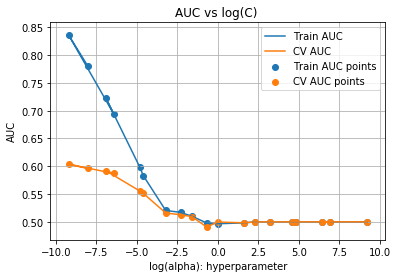

L1+++++++++++++++
0.6188196679224349
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [88]:
best_l1(X_tr,X_te)# calling function 


- AUC score is 0.6188196679224349
- optimal alpha is 0.0001

In [90]:
#test phase
# TEST PHASE FOR L1
sgd=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 64.404194%


In [91]:
pred_tr=sgd.predict(X_tr)

In [97]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.21      0.50      0.30      5459
           1       0.88      0.67      0.76     30593

   micro avg       0.64      0.64      0.64     36052
   macro avg       0.55      0.58      0.53     36052
weighted avg       0.78      0.64      0.69     36052



In [98]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

      

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

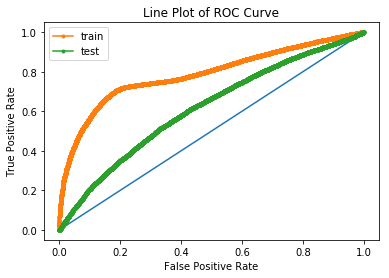

In [101]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [93]:
#confusion matrices_test
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,2705,2754
positive,10079,20514


In [94]:
#confusion matrices training data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,8506,2577
positive,16986,45127


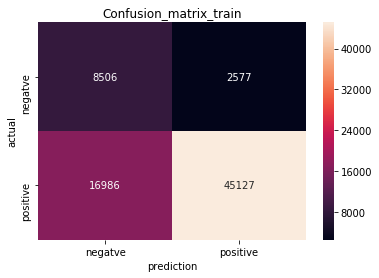

In [95]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=8506
- FP=2577
- FN=16986
- TP=45127

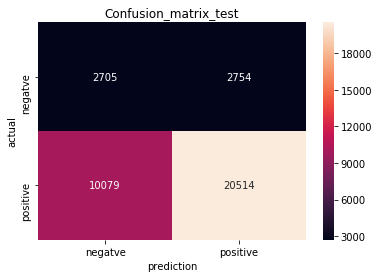

In [96]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2705
- FP=2754
- FN=10079
- TP=20514

###### l2 regularization

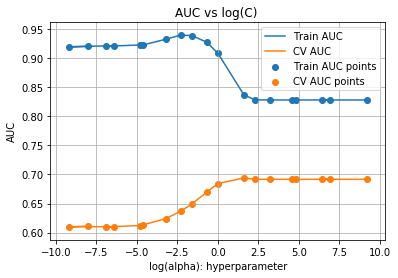

L2+++++++++++++++
0.7026059423418706
SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [102]:
best_l2(X_tr,X_te)# calling function 


- AUC score is 0.7026059423418706
- optimal alpha is 5

In [103]:
#test phase
# TEST PHASE FOR L2
sgd=SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 63.574836%


In [104]:
pred_tr=sgd.predict(X_tr)

In [105]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.24      0.67      0.36      5459
           1       0.91      0.63      0.75     30593

   micro avg       0.64      0.64      0.64     36052
   macro avg       0.58      0.65      0.55     36052
weighted avg       0.81      0.64      0.69     36052



In [106]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [107]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [108]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

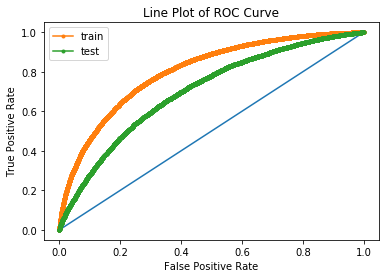

In [109]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [111]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,8676,2407
positive,20967,41146


In [112]:
#confusion matrices test
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,3650,1809
positive,11323,19270


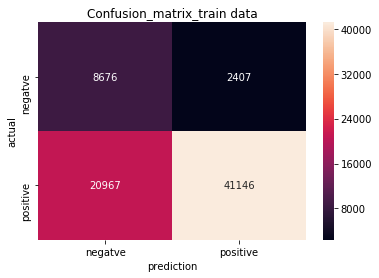

In [113]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=8696
- FP=2407
- FN=20967
- TP=41146

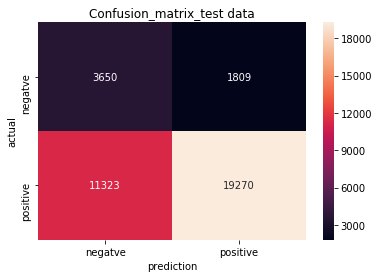

In [114]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=3650
- FN=5457
- FN=11323
- TP=19270

##### set 2 tfidf

In [115]:
#merging
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_titles_tfidf,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_titles_tfidf,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_titles_tfidf,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (73196, 16950) (73196,)
test matrix=> (36052, 16950) (36052,)


In [116]:
'''COLUMN STANDARDISED THE DATA MATRIX'''
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

scalar_1 = StandardScaler(with_mean=False)
scalar_1.fit(X_tr) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
standardized_1 = scalar_1.transform(X_tr)

standardized_2 = scalar_1.transform(X_te)

In [117]:
X_tr=standardized_1
X_te=standardized_2

###### l1 regularization

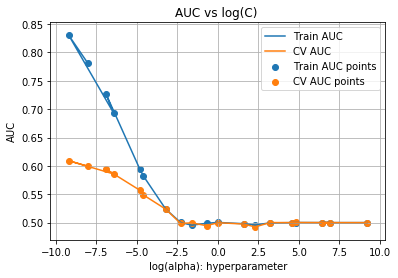

L1+++++++++++++++
0.6181791984796439
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [118]:
best_l1(X_tr,X_te)# calling function 


- AUC score is 0.6181791984796439
- optimal alpha is 0.0001

In [119]:
#test phase
# TEST PHASE FOR L1
sgd=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 65.022745%


In [120]:
pred_tr=sgd.predict(X_tr)

In [121]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.22      0.50      0.30      5459
           1       0.88      0.68      0.77     30593

   micro avg       0.65      0.65      0.65     36052
   macro avg       0.55      0.59      0.53     36052
weighted avg       0.78      0.65      0.70     36052



In [122]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [123]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

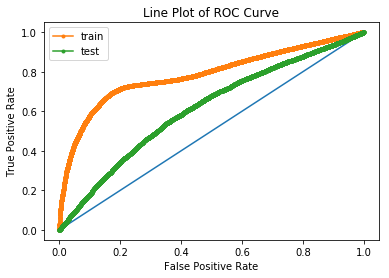

In [125]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [127]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,8709,2374
positive,17240,44873


In [128]:
#confusion matrices
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,2735,2724
positive,9886,20707


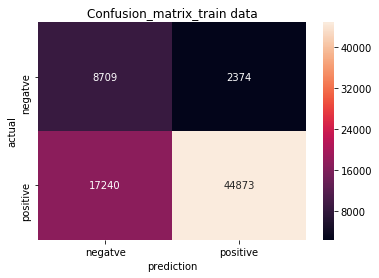

In [131]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=8709
- FP=2374
- FN=17240
- TP=44873

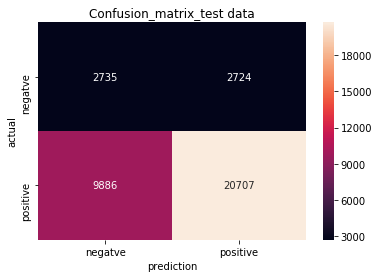

In [129]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2735
- FP=2724
- FN=9886
- TP=20707

###### l2 regularization

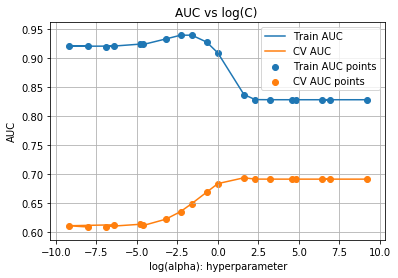

L2+++++++++++++++
0.7024896718965752
SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [132]:
best_l2(X_tr,X_te)# calling function 


- AUC score is 0.7024896718965752
- optimal alpha = 5

In [133]:
#test phase
# TEST PHASE FOR L2
sgd=SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 63.494397%


In [134]:
pred_tr=sgd.predict(X_tr)

In [135]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.24      0.67      0.36      5459
           1       0.91      0.63      0.74     30593

   micro avg       0.63      0.63      0.63     36052
   macro avg       0.58      0.65      0.55     36052
weighted avg       0.81      0.63      0.69     36052



In [136]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [137]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [138]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

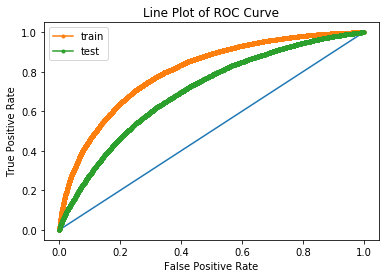

In [139]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [140]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,8705,2378
positive,21133,40980


In [141]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,3672,1787
positive,11374,19219


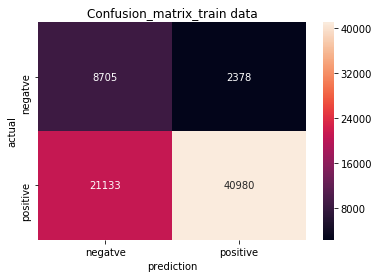

In [142]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=8705
- FP=2378
- FN=21133
- TP=40980

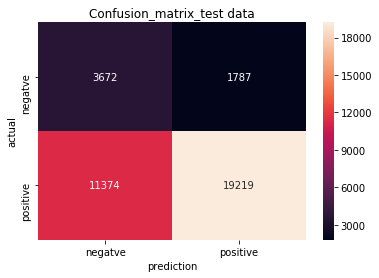

In [143]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=3672
- FP=1787
- FN=11374
- TP=19219

###### set_3 average word to vector 

In [144]:
#merging
from scipy.sparse import hstack
X_tr = hstack((avg_w2v_vectors_traintitle, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,avg_w2v_vectors_trainessay,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((avg_w2v_vectors_cvtitle, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,avg_w2v_vectors_cvessay,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((avg_w2v_vectors_testtitle, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,avg_w2v_vectors_testessay,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (73196, 701) (73196,)
test matrix=> (36052, 701) (36052,)


###### l1 regularization

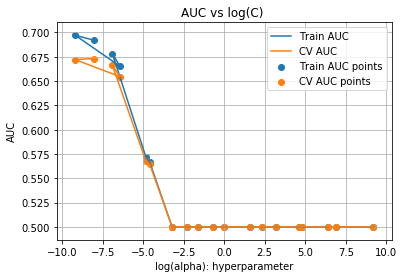

L1+++++++++++++++
0.6809336175454533
SGDClassifier(alpha=0.00032, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [155]:
best_l1(X_tr,X_te)# calling function 


- AUC score is 0.6809336175454533
- optimal alpha 0.00032

In [156]:
#test phase
# TEST PHASE FOR L1
sgd=SGDClassifier(alpha=0.00032, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 62.995118%


In [157]:
pred_tr=sgd.predict(X_tr)

In [158]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.24      0.64      0.34      5459
           1       0.91      0.63      0.74     30593

   micro avg       0.63      0.63      0.63     36052
   macro avg       0.57      0.63      0.54     36052
weighted avg       0.81      0.63      0.68     36052



In [159]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [160]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [161]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

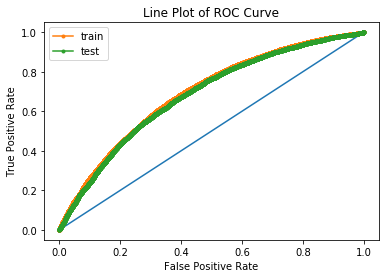

In [162]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [165]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,7212,3871
positive,22800,39313


In [166]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,3497,1962
positive,11379,19214


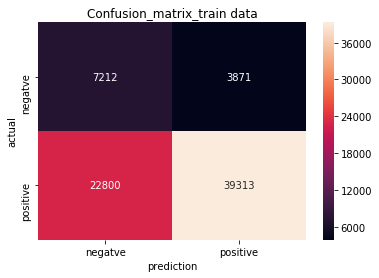

In [167]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=7212
- FP=3871
- FN=22800
- TP=39313

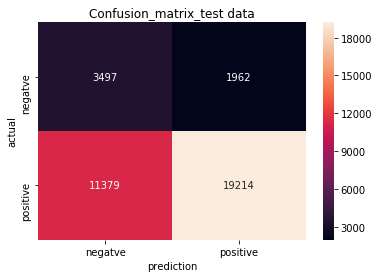

In [168]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=3497
- FP=1962
- FN=11379
- TP=19214

###### l2 regularization

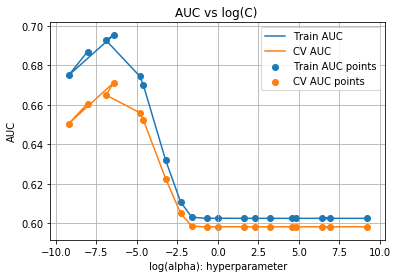

L2+++++++++++++++
0.6819060367743336
SGDClassifier(alpha=0.0016, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [169]:
best_l2(X_tr,X_te)

- AUC score is 0.6819060367743336
- optimal alpha 0.0016

In [170]:
#test phase
# TEST PHASE FOR L2
sgd=SGDClassifier(alpha=0.0016, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)


print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 71.577166%


In [171]:
pred_tr=sgd.predict(X_tr)

In [172]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.27      0.50      0.35      5459
           1       0.89      0.75      0.82     30593

   micro avg       0.72      0.72      0.72     36052
   macro avg       0.58      0.63      0.58     36052
weighted avg       0.80      0.72      0.75     36052



In [173]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [174]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [175]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

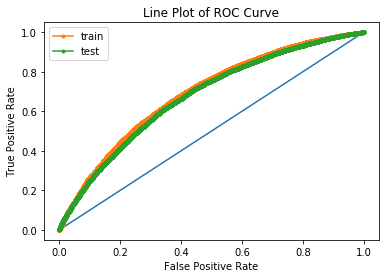

In [176]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [178]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,5671,5412
positive,14953,47160


In [179]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,2736,2723
positive,7524,23069


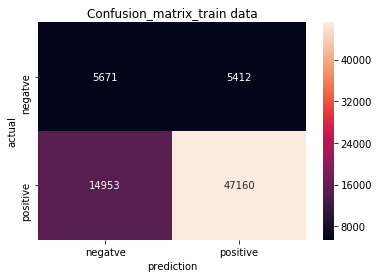

In [180]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2990
- FP=2469
- FN=13816
- TP=16777

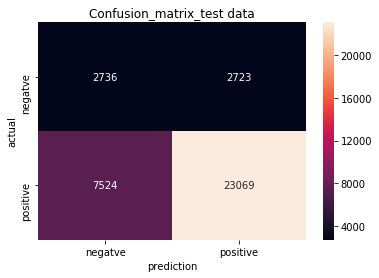

In [181]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2736
- FP=2723
- FN=7524
- TP=23069

##### set_4 tfidf average word to vector

In [182]:
#merging
from scipy.sparse import hstack
X_tr = hstack((tfidf_w2v_vectors_title_tr, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,tfidf_w2v_vectors_essay_tr,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm)).tocsr()
#X_cr = hstack((tfidf_w2v_vectors_title_cv, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,tfidf_w2v_vectors_essay_cv,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm)).tocsr()
X_te = hstack((tfidf_w2v_vectors_title_te, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,tfidf_w2v_vectors_essay_te,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
train matrix=> (73196, 701) (73196,)
test matrix=> (36052, 701) (36052,)


In [183]:
# Reshape your data either using array.reshape(-1, 1)
'''COLUMN STANDARDISED THE DATA MATRIX'''
scalar_1 = StandardScaler(with_mean=False)
scalar_1.fit(X_tr) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
standardized_1 = scalar_1.transform(X_tr)

standardized_2 = scalar_1.transform(X_te)

In [184]:
X_tr=standardized_1

X_te=standardized_2

###### l1 regularization

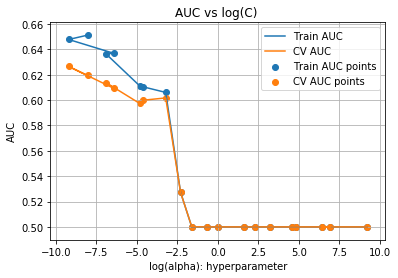

L1+++++++++++++++
0.638397496031114
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [185]:
best_l1(X_tr,X_te)# calling function 


- AUC score is 0.638397496031114
- optimal alpha 0.0001

In [186]:
#test phase
# TEST PHASE FOR L1
sgd=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)


print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 66.875624%


In [187]:
pred_tr=sgd.predict(X_tr)

In [188]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.22      0.48      0.30      5459
           1       0.88      0.70      0.78     30593

   micro avg       0.67      0.67      0.67     36052
   macro avg       0.55      0.59      0.54     36052
weighted avg       0.78      0.67      0.71     36052



In [189]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [191]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

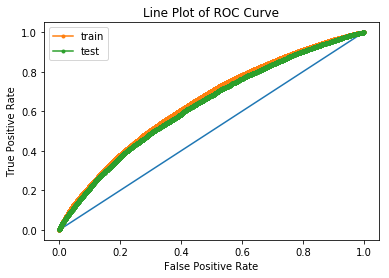

In [192]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [193]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,5541,5542
positive,18551,43562


In [194]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,2605,2854
positive,9088,21505


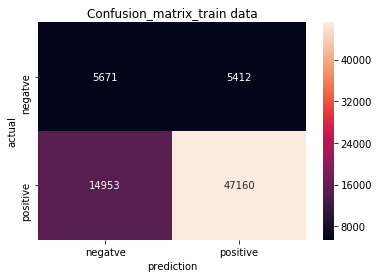

In [195]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=5671
- FP=5412
- FN=14953
- TP=47160

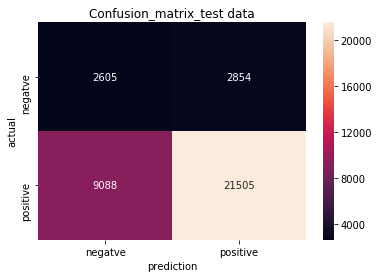

In [196]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2605
- FP=2854
- FN=9088
- TP=21505

###### l2 regularization

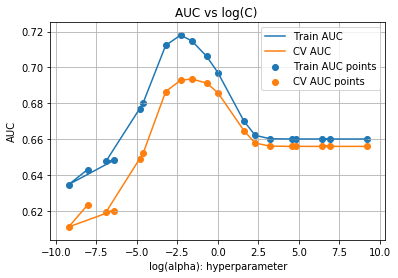

L2+++++++++++++++
0.699331951504578
SGDClassifier(alpha=0.2, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [197]:
best_l2(X_tr,X_te)# calling function 


- AUC score is 0.699331951504578
- optimal alpha 0.2

In [198]:
#test phase
# TEST PHASE FOR L2
sgd=SGDClassifier(alpha=0.2, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)


print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 59.777544%


In [199]:
pred_tr=sgd.predict(X_tr)

In [200]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.23      0.70      0.35      5459
           1       0.92      0.58      0.71     30593

   micro avg       0.60      0.60      0.60     36052
   macro avg       0.57      0.64      0.53     36052
weighted avg       0.81      0.60      0.65     36052



In [201]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [202]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [203]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

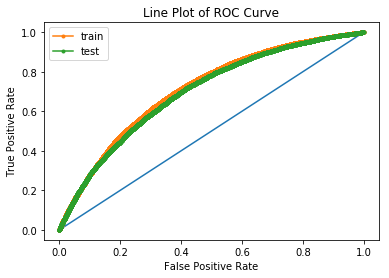

In [204]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [206]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,7950,3133
positive,25808,36305


In [207]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,3846,1613
positive,12888,17705


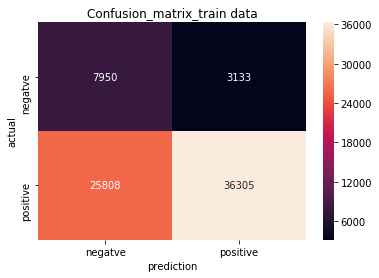

In [209]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=7950
- FP=3133
- FN=25808
- TP=36305

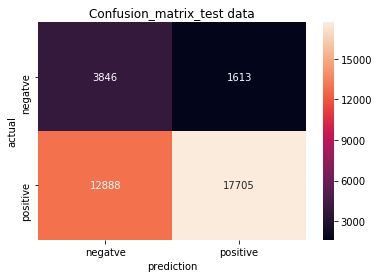

In [208]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=3456
- FP=1613
- FN=12888
- TP=17705

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [58]:
'''tfidf_essay'''
# making essay as 5000 dimentions
vectorizer_9 = TfidfVectorizer(ngram_range=(1,2),min_df=10,max_features=5000 )
vectorizer_9.fit(X_train['clean_essay'].values)# fit for train

# transform for all
X_train_essay_tfidf= vectorizer_9.transform(X_train['clean_essay'].values)

X_test_essay_tfidf = vectorizer_9.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


In [59]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
'''school_state : categorical data
clean_categories : categorical data
clean_subcategories : categorical data
project_grade_category :categorical data
teacher_prefix : categorical data
quantity : numerical data
teacher_number_of_previously_posted_projects : numerical data
price : numerical data
sentiment score's of each of the essay : numerical data#neu
                                                       #pos
                                                       #compound
                                                       #neg
number of words in the title : numerical data
number of words in the combine essays : numerical data

ALL HAVE BEEN VECTORIZED ABOVE'''   
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [60]:
X_train_essay_tfidf.shape

(73196, 5000)

In [61]:
# Reshape your data either using array.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
'''COLUMN STANDARDISED THE DATA MATRIX'''
scalar_1= StandardScaler(with_mean=False)
scalar_1.fit(X_train_essay_tfidf) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_essay_tfidf = scalar_1.transform(X_train_essay_tfidf)

X_test_essay_tfidf = scalar_1.transform(X_test_essay_tfidf)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


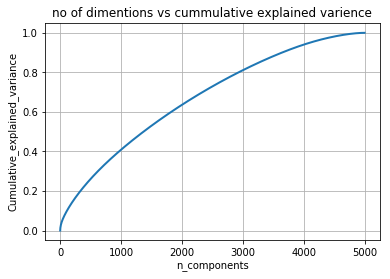

In [62]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
pca = TruncatedSVD(n_components=4999, n_iter=7, random_state=42)
pca.fit(X_train_essay_tfidf)

pca_train=pca.transform(X_train_essay_tfidf)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.title("no of dimentions vs cummulative explained varience")
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


- this curve is cummulative value of varience with dimentions
- this show that about 4000 features are containing more than 90% of varience
- so i am taking 4000 features in PCA 

In [63]:
#applying TruncatedSVD
pca = TruncatedSVD(n_components=4000, n_iter=7, random_state=42)
pca.fit(X_train_essay_tfidf)# train the data

pca_train=pca.transform(X_train_essay_tfidf) # train
pca_test=pca.transform(X_test_essay_tfidf)# test

In [64]:
print(pca_train.shape)

(73196, 4000)


In [65]:
#merging
from scipy.sparse import hstack
X_tr = hstack(( X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_subclean_cate_ohe,X_train_clean_cate_ohe,X_train_posted_norm,X_train_comp_norm,X_train_neu_norm,X_train_pos_norm,X_train_neg_norm,X_train_quantity_norm,X_train_title_norm,X_train_essay_norm,pca_train)).tocsr()
#X_cr = hstack(( X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm,X_cv_subclean_cate_ohe,X_cv_clean_cate_ohe,X_cv_posted_norm,X_cv_comp_norm,X_cv_neu_norm,X_cv_neg_norm,X_cv_pos_norm,X_cv_quantity_norm,X_cv_title_norm,X_cv_essay_norm)).tocsr()
X_te = hstack(( X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_subclean_cate_ohe,X_test_clean_cate_ohe,X_test_posted_norm,X_test_pos_norm,X_test_neu_norm,X_test_comp_norm,X_test_neg_norm,X_test_quantity_norm,X_test_title_norm,X_test_essay_norm,pca_test)).tocsr()

print("Final Data matrix")
print("train matrix=>",X_tr.shape, y_train.shape)

print("test matrix=>",X_te.shape, y_test.shape)
print("="*100)    



Final Data matrix
train matrix=> (73196, 4108) (73196,)
test matrix=> (36052, 4108) (36052,)


In [66]:
# Reshape your data either using array.reshape(-1, 1)
'''COLUMN STANDARDISED THE DATA MATRIX'''
scalar_1 = StandardScaler(with_mean=False)
scalar_1.fit(X_tr) # finding the mean and standard deviation of this data
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
standardized_1 = scalar_1.transform(X_tr)

standardized_2 = scalar_1.transform(X_te)

In [71]:
X_tr=standardized_1

X_te=standardized_2


##### l1 regularization

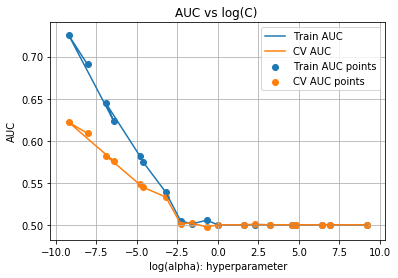

L1+++++++++++++++
0.6414530262101834
SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [72]:
best_l1(X_tr,X_te)# calling function 


- AUC score is 0.6414530262101834
- optimal alpha 0.0001

In [74]:
#test phase
# TEST PHASE FOR L1
sgd=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 70.814379%


In [75]:
pred_tr=sgd.predict(X_tr)

In [76]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.24      0.42      0.30      5459
           1       0.88      0.76      0.82     30593

   micro avg       0.71      0.71      0.71     36052
   macro avg       0.56      0.59      0.56     36052
weighted avg       0.78      0.71      0.74     36052



In [77]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [78]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [79]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

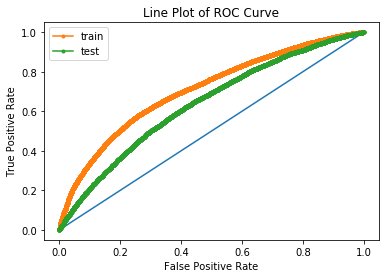

In [80]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [81]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,5275,5808
positive,13591,48522


In [82]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,2296,3163
positive,7359,23234


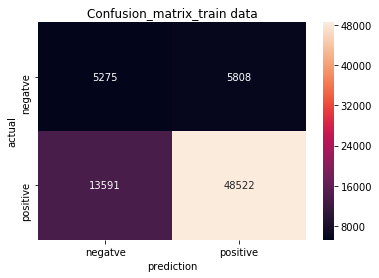

In [85]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=5275
- FP=5808
- FN=13591
- TP=48522

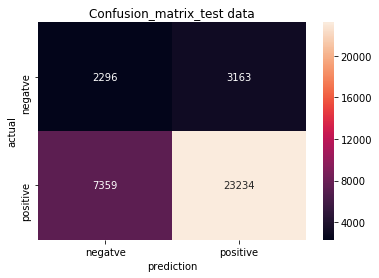

In [84]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=2296
- FP=3163
- FN=7359
- TP=23234

##### l2 regularization 

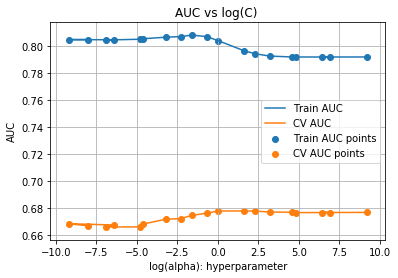

L2+++++++++++++++
0.688618463467683
SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


In [110]:
best_l2(X_tr,X_te)# calling function 


- AUC score is 0.688618463467683
- optimal alpha 5 

In [111]:
#test phase
# TEST PHASE FOR L2
sgd=SGDClassifier(alpha=5, average=False, class_weight='balanced',
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)
sgd.fit(X_tr,y_train)
pred = sgd.predict(X_te)
acc = accuracy_score(y_test, pred, normalize=True)*float(100)

print('\n****Test accuracy  is %f%%' % (acc))


****Test accuracy  is 84.369799%


In [112]:
pred_tr=sgd.predict(X_tr)

In [113]:
#other measuring parameters
from sklearn.metrics import classification_report
print("classification_report")
print(classification_report(y_test, pred))

classification_report
              precision    recall  f1-score   support

           0       0.18      0.01      0.02      5459
           1       0.85      0.99      0.92     30593

   micro avg       0.84      0.84      0.84     36052
   macro avg       0.52      0.50      0.47     36052
weighted avg       0.75      0.84      0.78     36052



In [114]:
#how to draw roc curve with hinge loss  :: https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge

score_roc_te =sgd.decision_function(X_te)
score_roc_tr =sgd.decision_function(X_tr)

In [115]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, score_roc_te)
a=fpr
b=tpr
c=thresholds

In [116]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, score_roc_tr)

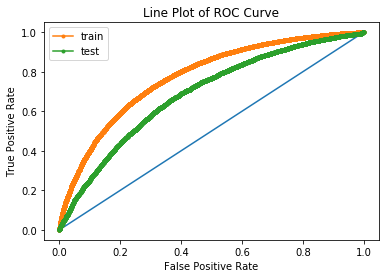

In [117]:
#PLOT OF ROC   
    # plot no skill
plt.plot([0, 1], [0, 1])
    # plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label="train")
plt.plot(a,b, marker='.',label='test')
    #plt.plot(k,pred_cv)
plt.title("Line Plot of ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [118]:
#confusion matrices train data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_train, pred_tr)
class_label=['negatve','positive']
df_1=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df_1

,negatve,positive
negatve,6,11077
positive,2,62111


In [119]:
#confusion matrices test data
#https://pandas-ml.readthedocs.io/en/latest/conf_mat.html
con_matrix=confusion_matrix(y_test, pred)
class_label=['negatve','positive']
df=pd.DataFrame(con_matrix,index=class_label,columns=class_label)
df

,negatve,positive
negatve,51,5408
positive,227,30366


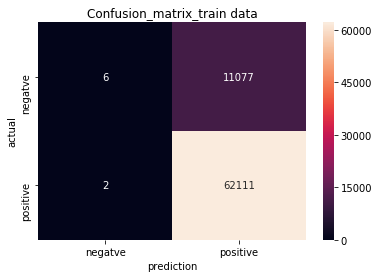

In [120]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df_1,annot=True,fmt='d')
plt.title('Confusion_matrix_train data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=6
- FP=11077
- FN=2
- TP=62111

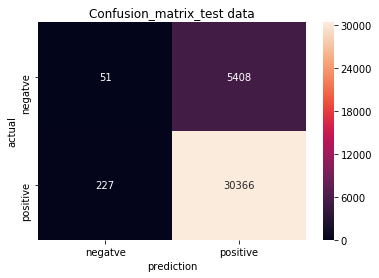

In [121]:
# how can i plot confusion matrix //https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
sns.heatmap(df,annot=True,fmt='d')
plt.title('Confusion_matrix_test data')
plt.xlabel("prediction")
plt.ylabel("actual")
plt.show()

- TN=51
- FP=5408
- FN=227
- TP=30366

<h1>3. Conclusion</h1>

In [122]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "alpha_l1","alpha_l2","AUC_l1","AUC_l2"]

In [123]:
x.add_row(['bow','sgd with hinge loss',0.0001,5,0.6188196679224349,0.7026059423418706])
x.add_row(['tfidf','sgd with hinge loss',0.0001,5, 0.6181791984796439,0.7024896718965752])
x.add_row(['average_word_2_vector','sgd with hinge loss',0.00032,0.0016,0.6809336175454533,0.6819060367743336])
x.add_row(['tfidf_word_2_vector','sgd with hinge loss',0.0001,0.2,0.638397496031114,0.699331951504578])
x.add_row(['added Features Set 5','sgd with hinge loss',0.0001,5,0.6414530262101834,0.688618463467683])

In [124]:
print(x)

+-----------------------+---------------------+----------+----------+--------------------+--------------------+
|       Vectorizer      |        Model        | alpha_l1 | alpha_l2 |       AUC_l1       |       AUC_l2       |
+-----------------------+---------------------+----------+----------+--------------------+--------------------+
|          bow          | sgd with hinge loss |  0.0001  |    5     | 0.6188196679224349 | 0.7026059423418706 |
|         tfidf         | sgd with hinge loss |  0.0001  |    5     | 0.6181791984796439 | 0.7024896718965752 |
| average_word_2_vector | sgd with hinge loss | 0.00032  |  0.0016  | 0.6809336175454533 | 0.6819060367743336 |
|  tfidf_word_2_vector  | sgd with hinge loss |  0.0001  |   0.2    | 0.638397496031114  | 0.699331951504578  |
|  added Features Set 5 | sgd with hinge loss |  0.0001  |    5     | 0.6414530262101834 | 0.688618463467683  |
+-----------------------+---------------------+----------+----------+--------------------+--------------

##### note

- the last model is useless
- class_weight =balanced in my model